In [ ]:
import openslide
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
base_path = Path('/mnt/z/shared_data/GBM_spatial_transcriptomics')
sample_1512_path = base_path / 'Sample-1512/Images'
tif_1512_A_path = sample_1512_path / '20H214_Al-Holou_GEX_Slide_Square_A.tif'

In [ ]:
# Important to tile (and optionally pyramidize) the tiffs if they aren't yet
# !vips im_vips2tiff /mnt/z/shared_data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_A.tif '../h&e_images/20H214_Al-Holou_GEX_Slide_Square_A_tiled.tif:none,tile:256x256,pyramid'
# !vips im_vips2tiff /mnt/z/shared_data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_B.tif '../h&e_images/20H214_Al-Holou_GEX_Slide_Square_B_tiled.tif:none,tile:256x256,pyramid'
# !vips im_vips2tiff /mnt/z/shared_data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_C.tif '../h&e_images/20H214_Al-Holou_GEX_Slide_Square_C_tiled.tif:none,tile:256x256,pyramid'
# !vips im_vips2tiff /mnt/z/shared_data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_C.tif '../h&e_images/20H214_Al-Holou_GEX_Slide_Square_C_tiled.tif:none,tile:256x256,pyramid'

In [ ]:
slide = openslide.OpenSlide('../h&e_images/20H214_Al-Holou_GEX_Slide_Square_A_tiled.tif')

In [ ]:
slide.get_thumbnail((256,256))

In [ ]:
slide.properties

In [ ]:
import pyvips

In [ ]:
in_img = pyvips.Image.new_from_file(str(tif_1512_A_path))
in_img.tiffsave('../h&e_images/pyvips_test_img_A.tif',
                compression='none',
                tile=True,
                tile_width=256,
                tile_height=256,
                pyramid=True
               )

In [ ]:
slide2 = openslide.OpenSlide('../h&e_images/pyvips_test_img_A.tif')
slide2.get_thumbnail((256,256))

In [ ]:
from normalize_HnE import norm_HnE

In [ ]:
slide2.level_dimensions

In [ ]:
img = slide2.read_region((7800,7900), 1, (1024,1024))
img = img.convert('RGB')
img = np.array(img)

plt.imshow(img)

In [ ]:
img_norm, h_img, e_img = norm_HnE(img)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Normalized Image')
plt.imshow(img_norm)
plt.subplot(223)
plt.title('H image')
plt.imshow(h_img)
plt.subplot(224)
plt.title('E image')
plt.imshow(e_img)
plt.show()

In [ ]:
import os   
# replace with path to your own vips bin folder
VIPSHOME = 'C:\\Users\\maddoxav\\vips-dev-w64-web-8.12.2\\vips-dev-8.12\\bin'
with os.add_dll_directory(VIPSHOME):
    import pyvips

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 


In [ ]:
data_path = Path("c:/Users/maddoxav/OneDrive - Michigan Medicine/Documents/Rao_Lab/data")
tif_1512_path = data_path / "GBM_spatial_transcriptomics/Sample-1512/Images"
tif_1512_A_path = tif_1512_path / "20H214_Al-Holou_GEX_Slide_Square_A.tif"
wsi_1512_A_path = tif_1512_path / "TP_20H214_Al-Holou_GEX_Slide_Square_A.tif"
in_img = pyvips.Image.new_from_file(str(tif_1512_A_path))


In [ ]:
in_img.tiffsave(str(wsi_1512_A_path),
                compression='none',
                tile=True,
                tile_width=256,
                tile_height=256,
                pyramid=True
                )

In [ ]:
list(tif_1512_path.glob('*.tif'))
def tile_pyramidize(tif_dir, dest_dir):
    

In [ ]:
import os
# replace with path to your own openslide bin folder
OPENSLIDE_PATH = 'C:\\Users\\maddoxav\\openslide-win64-20171122\\openslide-win64-20171122\\bin'
with os.add_dll_directory(OPENSLIDE_PATH):
    import openslide 
    from openslide import open_slide

In [ ]:
from pyarrow import feather

In [ ]:
df_path = r"C:\Users\maddoxav\OneDrive - Michigan Medicine\Documents\Rao_Lab\data\GBM_spatial_transcriptomics\assay_data\s1512_count_mat.feather"
df = feather.read_feather(df_path)

In [ ]:
df.head()

In [ ]:
xs, ys  = zip(*[x.split('.') for x in list(df.columns[1:])])

In [ ]:
import numpy as np
nxs = np.array(xs)
nys = np.array(ys)
len(np.unique(nxs))

In [ ]:
len(np.unique(nys))

In [ ]:
np.unique(nys)

In [ ]:
fpath = r"C:\Users\maddoxav\OneDrive - Michigan Medicine\Documents\Rao_Lab\data\GBM_spatial_transcriptomics\assay_data\brain1A-s4774-count_mat.feather"
df = feather.read_feather(fpath)

In [ ]:
df.head()


In [ ]:
fpath = r"C:\Users\maddoxav\OneDrive - Michigan Medicine\Documents\Rao_Lab\data\GBM_spatial_transcriptomics\assay_data\brain1A-s4774-tc.feather"
df = feather.read_feather(fpath)


In [ ]:
df.head()

In [ ]:
assay_data_dir = Path(r"C:\Users\maddoxav\OneDrive - Michigan Medicine\Documents\Rao_Lab\data\GBM_spatial_transcriptomics\assay_data") 
md_fname = assay_data_dir / "brain1A-s4774-count_mat.feather" 
tc_fname = assay_data_dir / "brain1A-s4774-tc.feather"
md = feather.read_feather(md_fname)
tc = feather.read_feather(tc_fname)

In [ ]:
md.head()

In [ ]:
tc.head()

In [63]:
import matplotlib.pyplot as plt
import torch
import feather
from pathlib import Path
import pandas as pd

In [4]:
data_path = Path(r"C:\Users\maddoxav\OneDrive - Michigan Medicine\Documents\Rao_Lab\data\GBM_spatial_transcriptomics")
tile_path = data_path / "Raw_Tiles" 

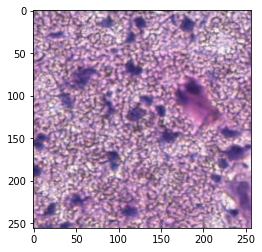

In [5]:
tile_sample_fname = "s1512-brain1D-TTGTAAGGACCTAAGT-1_4-256x256.jpeg"
tile_sample_path = tile_path / tile_sample_fname
tile_sample = plt.imread(tile_sample_path)
plt.imshow(tile_sample)

In [106]:
def parse_tile_name(tile_name: str):
    """Parse tile name into its components"""
    components = tile_name.split("-")
    sample_id = components[0]
    tissue_id = components[1]
    barcode = components[2] + "." + components[3]
    size = components[4].removesuffix(".jpeg")
    size = size.split("x")
    size = tuple(int(dim) for dim in size)
    return {
        "sample_id": sample_id,
        "tissue_id": tissue_id,
        "barcode": barcode,
        "size": size,
    }


def unparse_tile_name(
    sample_id: str, tissue_id: str, barcode: str, size: tuple[int, int]
):
    barcode = '-'.join(barcode.split('.'))
    return f"{sample_id}-{tissue_id}-{barcode}-{size[0]}x{size[1]}.jpeg"


In [107]:
print(tile_sample_fname)
comps = parse_tile_name(tile_sample_fname)
print(comps)
unparse_tile_name(
    comps["sample_id"], comps["tissue_id"], comps["barcode"], comps["size"]
)


s1512-brain1D-TTGTAAGGACCTAAGT-1_4-256x256.jpeg
{'sample_id': 's1512', 'tissue_id': 'brain1D', 'barcode': 'TTGTAAGGACCTAAGT.1_4', 'size': (256, 256)}


's1512-brain1D-TTGTAAGGACCTAAGT-1_4-256x256.jpeg'

In [8]:
sample_path = data_path / "Sample-1512" 
count_mat_fname = "brain1A-s1512-count_mat.feather" 
count_mat_path = sample_path / "assay_data" / count_mat_fname 
count_mat = feather.read_dataframe(count_mat_path)
count_mat.head()

,symbol,AAACAAGTATCTCCCA.1_1,AAACACCAATAACTGC.1_1,AAACAGCTTTCAGAAG.1_1,AAACAGGGTCTATATT.1_1,AAACAGTGTTCCTGGG.1_1,AAACATTTCCCGGATT.1_1,AAACCCGAACGAAATC.1_1,AAACCGGGTAGGTACC.1_1,AAACCGTTCGTCCAGG.1_1,...,TTGTGGTGGTACTAAG.1_1,TTGTGTATGCCACCAA.1_1,TTGTGTTTCCCGAAAG.1_1,TTGTTAGCAAATTCGA.1_1,TTGTTCAGTGTGCTAC.1_1,TTGTTGTGTGTCAAGA.1_1,TTGTTTCACATCCAGG.1_1,TTGTTTCATTAGTCTA.1_1,TTGTTTCCATACAACT.1_1,TTGTTTGTATTACACG.1_1
0,AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AL627309.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LINC01409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,FAM87B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LINC01128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
def parse_count_mat_fname(count_mat_fname: str):
    """Parse count matrix file name into components"""
    components = count_mat_fname.split("-")
    tissue_id = components[0]
    sample_id = components[1]
    return {"sample_id": sample_id, "tissue_id": tissue_id}


In [113]:
def get_symbol_values(count_mat_dpath: Path, symbol: str):
    """
    Get symbol(eg gene) values for all sample+tissue count matrices
    where each count matrix is symbols(first row) x barcodes(colnames[1:])
    """
    count_mat_fpaths = list(count_mat_dpath.glob("*-count_mat.feather"))
    values = pd.Series(dtype="float64")
    for mat_fpath in count_mat_fpaths:
        mat_fname = mat_fpath.name
        name_components = parse_count_mat_fname(mat_fname)
        count_mat = feather.read_dataframe(mat_fpath)
        count_mat.set_index(keys="symbol", inplace=True)
        count_mat = count_mat.loc[symbol, :].T.reset_index()
        count_mat.rename({"index": "barcode", symbol: "value"}, axis=1, inplace=True)
        count_mat["sample_id"] = name_components["sample_id"]
        count_mat["tissue_id"] = name_components["tissue_id"]
        count_mat.set_index(keys=["sample_id", "tissue_id", "barcode"], inplace=True)
        new_values = count_mat["value"]
        values = pd.concat([values, new_values], axis=0)
    return values


In [121]:
gene = 'XKRX' 
count_mat_dpath = data_path / 'assay_data' 
xkrx_values = get_symbol_values(count_mat_dpath, gene)
xkrx_values.head()

(s1512, brain1A, AAACAAGTATCTCCCA.1_1)    0.0
(s1512, brain1A, AAACACCAATAACTGC.1_1)    0.0
(s1512, brain1A, AAACAGCTTTCAGAAG.1_1)    0.0
(s1512, brain1A, AAACAGGGTCTATATT.1_1)    0.0
(s1512, brain1A, AAACAGTGTTCCTGGG.1_1)    0.0
dtype: float64

In [133]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.io import read_image

import numpy as np

In [127]:
class VisiumImageDataset(Dataset):
    def __init__(
        self,
        data_path: Path,
        count_mat_dir: str,
        raw_tile_dir: str,
        tile_size: tuple[int, int],
        symbol: str,
        transform=None,
        target_transform=None,
    ):
        count_mat_dpath = data_path / count_mat_dir
        self.tile_labels = get_symbol_values(count_mat_dpath, symbol)
        self.tile_dpath = data_path / raw_tile_dir 
        self.tile_size = tile_size
        self.symbol = symbol
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.tile_labels)

    def __getitem__(self, idx):
        sample_id, tissue_id, barcode = self.tile_labels.index[idx]
        tile_name = unparse_tile_name(sample_id, tissue_id, barcode, self.tile_size)
        tile_fpath = self.tile_dpath / tile_name
        image = read_image(str(tile_fpath))
        label = self.tile_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [128]:
data_path = Path(r"C:\Users\maddoxav\OneDrive - Michigan Medicine\Documents\Rao_Lab\data\GBM_spatial_transcriptomics")
count_mat_dir = "assay_data" 
raw_tile_dir = "Raw_Tiles" 
tile_size = (256, 256) 
symbol = 'XKRX'

data = VisiumImageDataset(data_path, count_mat_dir, raw_tile_dir, tile_size, symbol)

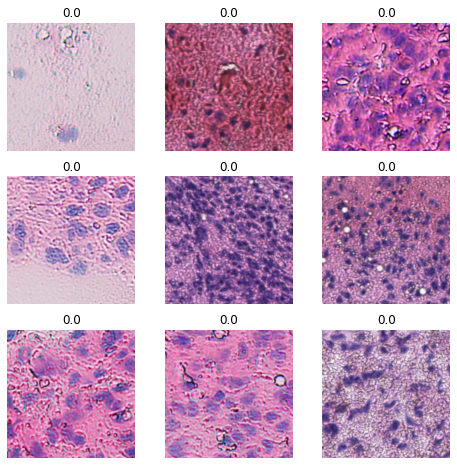

In [136]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx]
    img = np.asarray(img).transpose(1,2,0)
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [22]:
from visium_datasets import VisiumImageDataset 
from pathlib import Path
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np

In [6]:
data_path = Path(r"C:\Users\maddoxav\OneDrive - Michigan Medicine\Documents\Rao_Lab\data\GBM_spatial_transcriptomics")
count_mat_dir = "assay_data" 
raw_tile_dir = "Raw_Tiles" 
tile_size = (256, 256) 
symbol = 'GFAP'

full_data = VisiumImageDataset(data_path, count_mat_dir, raw_tile_dir, tile_size, symbol)

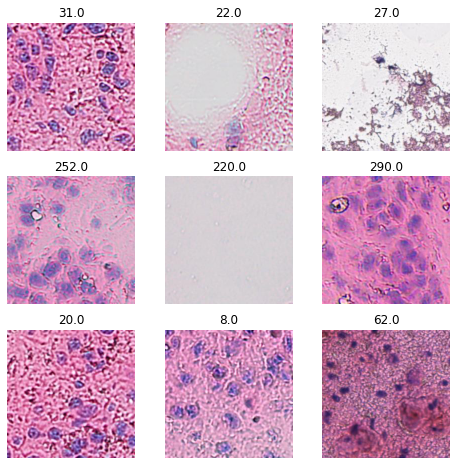

In [13]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(full_data), size=(1,)).item()
    img, label = full_data[sample_idx]
    img = np.asarray(img).transpose(1,2,0)
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [14]:
train_frac = 0.8
train_len = int(len(full_data) * train_frac)
test_len = len(full_data) - train_len
train_data, test_data = torch.utils.data.random_split(
    full_data, [train_len, test_len], generator=torch.Generator().manual_seed(42)
)

In [17]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 256, 256])
Labels batch shape: torch.Size([64])


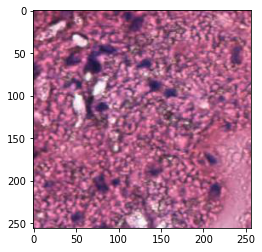

Label: 63.0


In [19]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(np.array(img).transpose(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")

In [24]:
net = torchvision.models.vgg16(pretrained = True)
net.classifier[6] = nn.Linear(in_features=4096, out_features=1)

In [27]:
net.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1, bias=True)
)